<a href="https://colab.research.google.com/github/oscarld-dl/ML-Workshop/blob/main/Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

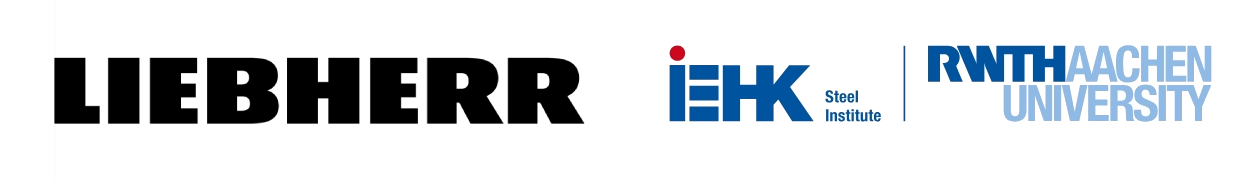

In [1]:
from IPython.display import Image, display
display(Image("head.jpg"))

# SciML Workshop

RWTH Aachen University, 07.10.2025




***************************************************************************************************************************
**The goal of this workshop is to understand how we have developed the descriptive and predictive analyses using ML/DL tools.**
***************************************************************************************************************************

**Tasks for the Descriptive Analysis:**
-------------
1. The importance of **"Data Cleaning"**.
2. Understanding why do we need the **stastistics metrics** and how to code them.
3. Visualization of the metrics using **boxplots** within a ROI, and **identification of potential outliers**.
4. **Correlation analysis** using Spearman heatmap.
5. **Sensitivity analysis** based on the Spearman correlations.
6. Reducing the design space dimensionality using **"Principal Component Analysis (PCA)"**

**Import the basic libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

During the **experimental data extraction**, some **sensors failed** to **record values correctly**, resulting in **missing (NaN)** or **zero values** for certain **input/output parameters** in specific designs. To ensure the reliability of the analysis and avoid misleading results, it is essential to identify and handle these incomplete or invalid entries—typically by **replacing zeros with NaN** and **removing rows where critical values are missing.**

In [9]:
df_cleaning = pd.read_excel("/content/master.xlsx", sheet_name="cleaning", engine="openpyxl")

print(df_cleaning)

# .replace & .dropna to get rid of those incorrect values.
df_cleaning.replace(0, np.nan, inplace=True)
df_clean = df_cleaning.dropna()

print(df_clean)

   #Design       C  $H_{T1}$  $H_{T2}$  P       d  $\alpha$  Pearlite  \
0      D01  0.0014       920       830  4  0.0335      0.90      0.10   
1      D02  0.0014       940       810  4  0.0935      0.50      0.50   
2      D03  0.0014       920       790  4  0.0335      0.75      0.25   
3      D04  0.0020       880       830  4  0.0935      0.50      0.50   
4      D05  0.0014       900       830  2  0.0335      0.90      0.10   
..     ...     ...       ...       ... ..     ...       ...       ...   
57     D65  0.0017       900       830  2  0.0635      0.75      0.25   
58     D67  0.0020       880       810  2  0.0335      0.75      0.25   
59     D68  0.0020       920       810  4  0.0935      0.75      0.25   
60     D69  0.0017       900       850  0  0.0335      0.50      0.50   
61     D70  0.0017         0       790  2  0.0635      0.90      0.10   

    $Cryo_{T}$  $Cryo_{t}$  ...  D-MP$_3$  D-MP$_4$  D-MP$_5$  D-MP$_6$  \
0       -125.0        3600  ...  0.109031  0.094

In [4]:
#Read the file you want to extract the metrics from:
df_experimental = pd.read_excel("/content/master.xlsx", sheet_name='experimental')

#Select just the number columns to avoid any future problem with the calculations:
num_df = df_experimental.select_dtypes(include=[np.number])

#Now, we use .agg (aggregate function from pandas) to select which function we want to apply to each column:
stats = num_df.agg(['min', 'max', 'mean', 'std']).transpose()

stats.columns = ['Min.', 'Max.', 'Mean', 'SD']
stats = stats.round(5)

#One can save it to excel like:
#stats.to_csv("/content/workshop_stats.csv")

print(stats)

                     Min.        Max.        Mean          SD
C                 0.00140     0.00200     0.00169     0.00026
$H_{T1}$        880.00000   940.00000   912.41379    22.25463
$H_{T2}$        790.00000   850.00000   818.96552    22.36247
P                 2.00000    10.00000     5.21839     3.33210
d                 0.03350     0.09350     0.06453     0.02397
$\alpha$          0.50000     0.90000     0.73276     0.15808
Pearlite          0.10000     0.50000     0.26724     0.15808
$Cryo_{T}$     -125.00000   -75.00000  -100.00000    20.17366
$Cryo_{t}$     2400.00000  4800.00000  3655.17241   983.91229
$Temper_{T}$    150.00000   250.00000   200.57471    41.40993
$Temper_{t}$   3600.00000  7200.00000  5400.00000  1452.50385
D-MP$_1$          0.09073     0.14690     0.11498     0.01393
D-MP$_2$          0.09266     0.14710     0.11624     0.01373
D-MP$_3$          0.09073     0.14690     0.11498     0.01393
D-MP$_4$          0.07881     0.13238     0.10074     0.01363
D-MP$_5$

**Let's see how to get the boxplots for a better visualization of the outliers.**

**Add the necessary libraries for this part:**

In [5]:
import seaborn as sns

/tmp/ipython-input-3656173740.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MP", y="Hardness", data=df_melted, palette={'orange'})


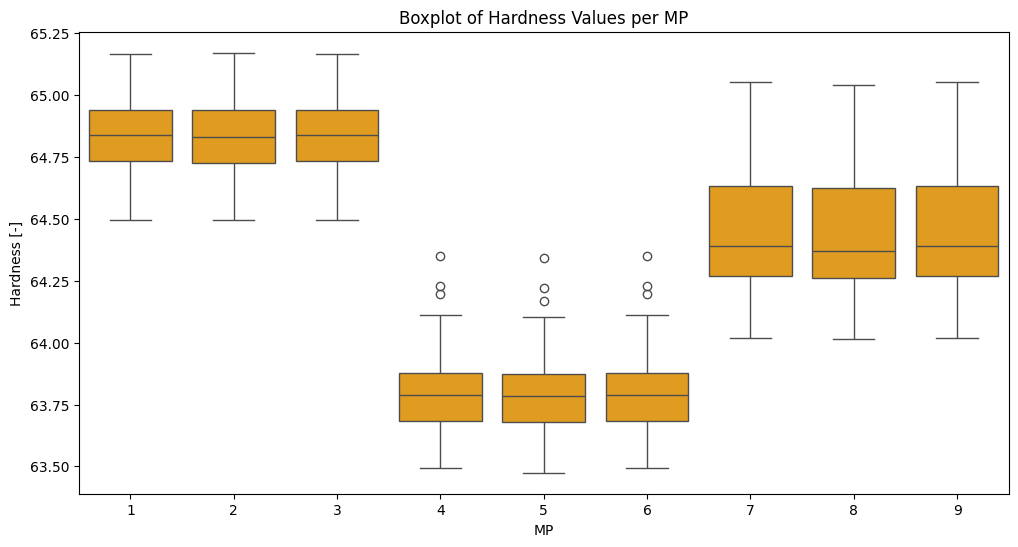

In [6]:
df_boxplots = pd.read_excel("/content/master.xlsx", sheet_name="boxplots")

df_renamed = df_boxplots.rename(columns={
    "HRC-MP1": "1",
    "HRC-MP2": "2",
    "HRC-MP3": "3",
    "HRC-MP4": "4",
    "HRC-MP5": "5",
    "HRC-MP6": "6",
    "HRC-MP7": "7",
    "HRC-MP8": "8",
    "HRC-MP9": "9"
})

#We create a list with every column name ['1', '2', ... ]:
distortion_cols = [f"{i}" for i in range(1, 10)]

#Since Seaborn requires long format, we use .melt to transform the data frame:
df_melted = df_renamed.melt(value_vars=distortion_cols, var_name="MP", value_name="Hardness")

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x="MP", y="Hardness", data=df_melted, palette={'orange'})
plt.title("Boxplot of Hardness Values per MP")
plt.ylabel("Hardness [-]")
plt.savefig('Boxplot of Hardness Values per MP.jpg', dpi=300, bbox_inches='tight')

plt.show()

**Try to get the distortion boxplot now**

In [7]:
df_boxplots = pd.read_excel("/content/master.xlsx", sheet_name="boxplots")

df_renamed = df_boxplots.rename(columns={
##
    # Your code goes here:
##
})

#Every line should be completed from now onwards:

# We create a list with every column name ['1', '2', ... ]:
distortion_cols = [f"{i}" for i in range()]

#Since Seaborn requires long format (vertical), we use .melt to transform the data frame:
df_melted = df_renamed.melt(value_vars=distortion_cols, var_name="", value_name="")

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot()
plt.title("Boxplot of _ Values per _")
plt.ylabel("_")

#If we want to save the plot:
#plt.savefig('Boxplot of _ Values per _.jpg', dpi=300, bbox_inches='tight')

plt.show()

TypeError: range expected at least 1 argument, got 0

**I&O Correlations**
---

**Spearman correlation:**

In [ ]:
# Select relevant columns (both input & output data)
# We have already read the data frame we need; see the first cell.

# Assuming your input parameters are the first 11 columns and outputs are the last 9 columns
input_columns = df_experimental.columns[1:12]  # First 11 columns (Input parameters)
print(input_columns)
output_columns = df_experimental.columns[12:]  # Last 9 columns (Distortion outputs)
print(output_columns)

# Compute the Spearman correlation
correlation_matrix = df_experimental[input_columns.tolist() + output_columns.tolist()].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap - Inputs vs Distortions")
#plt.savefig("Spearman_Correlation_Heatmap_Seaborn.jpg", dpi=1000, bbox_inches='tight')
plt.show()

**Sensitivity analysis based on Spearman correlation:**

In [ ]:
#Create a blank DataFrame to store the relative importance of each input on each output:
importance_matrix = pd.DataFrame(index=input_columns, columns=output_columns)

#Iterate through each output variable:
for i in range(len(output_columns)):
    target_output = output_columns[i]

    # Compute Spearman correlation between each input and the selected output
    spearman_corr = df_experimental[input_columns].corrwith(df_experimental[target_output], method='spearman').abs()

    # Normalize to sum to 1 (i.e., relative importance)
    importance = (spearman_corr / spearman_corr.sum()) * 100

    #Store the computed importance values for this output in the correct column of importance_matrix:
    importance_matrix[target_output] = importance


    # Plot
    plt.figure(figsize=(10, 6))
    importance.sort_values(ascending=False).plot(kind='bar')

    plt.ylabel("Relative Importance [%]")
    plt.xticks(rotation=45)
    plt.title(f"Sensitivity of Inputs to {target_output} (Spearman-Based)")
    plt.ylim(0, importance.max() * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig(f"Spearman_Input_Importance_Barplot_{target_output}.jpg", dpi=1000)
    plt.show()

print(importance_matrix)

**Principal Component Analysis (PCA): dimensionality reduction**
------------------------------------------------------------

**First, import the neccesary libraries:**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**2D PCA plots:**

**Why normalization for PCA?**

PCA works by finding directions (principal components) that capture the maximum variance in the data. If one feature has a much larger range than others, it will dominate the variance and skew the components — regardless of its actual importance.

In [ ]:
# Read the Excel file
df_PCA = pd.read_excel("/content/master.xlsx", sheet_name="PCA")

X = df_PCA.iloc[1:89, 1:12].values
Y = df_PCA.iloc[1:89, 21:].values

# Normalize inputs and outputs separately
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
Y_normalized = scaler_Y.fit_transform(Y)

# Concatenate normalized inputs and outputs
#X_combined = np.hstack((X_normalized, Y_normalized))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_normalized)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")

# Scatter plot of PCA components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Heat Treatment Inputs and Distortions")
#plt.savefig("PCA Visualization of Heat Treatment Inputs and Distortions.jpg", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
# Now we try to identify what are the most influential variables by coloruing them:

color_values = df_PCA.iloc[1:89, 4].values  # Adjust the index if needed

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_values, cmap='coolwarm', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization Colored by Gas Quenching Pressure (P)")

# Add color bar
plt.colorbar(scatter, label="Gas Quenching Pressure (P)")

plt.tight_layout()
plt.show()

**Let's try to colour Ferrite, and see what happens within the PC 1**

In [ ]:
#
    # Your code goes here:
#

**3D PCA plots:**

In [ ]:
# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_normalized)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")

# 3D scatter plot of PCA components
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.7)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.title("3D PCA Visualization of Heat Treatment Inputs and Distortions")
plt.tight_layout()
#plt.savefig("PCA Visualization of Heat Treatment Inputs and Distortions.jpg", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Color by 'P' column (Gas Quenching Pressure)
color_values = df_PCA.iloc[1:89, 4].values  # Adjust index if needed

# 3D scatter plot
p = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=color_values, cmap="coolwarm", alpha=0.8)

# Axis labels
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("3D PCA Visualization Colored by P")

# Colorbar
fig.colorbar(p, ax=ax, label="Gas Quenching Pressure (P)")

plt.tight_layout()
plt.show()

**Let's visualize also what happens with the carburizing temperature, HT1:**

In [ ]:
#
  # Your code goes here:
#